<a href="https://colab.research.google.com/github/BimsaraS99/Potato-Plant-Disease-Classification-using-Deep-Learning-/blob/main/Plant_Defect_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Importing Tensorflow package and other neccesary packages in order the train the deep learning model.
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import InputLayer, Rescaling, Resizing, RandomZoom, RandomRotation
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
import cv2
import imghdr

In [4]:
# Enable the GPU for the training process
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
tf.config.list_physical_devices('GPU')

[]

In [5]:
# unzip the dataset
!unzip -q /content/drive/MyDrive/Datasets/Potato_Plant_Dataset.zip

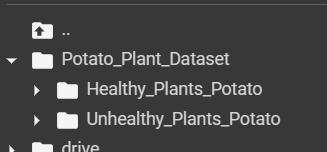

In [6]:
dataset_location = '/content/Potato_Plant_Dataset'

In [12]:
# Remove non-image files from the dataset if any are present and resize all the images into 256x256
image_exts = ['jpg', 'jpeg', 'png', 'bmp']

for image_class in os.listdir(dataset_location):
    for image in os.listdir(os.path.join(dataset_location, image_class)):
        image_path = os.path.join(dataset_location, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip in image_exts:
                resized_img = cv2.resize(img, (256, 256))
                cv2.imwrite(image_path, resized_img)
            else:
                print('Skipped non-image file: {}'.format(image_path))
        except Exception as e:
            print('Issue with image {}: {}'.format(image_path, str(e)))


In [14]:
data = tf.keras.utils.image_dataset_from_directory(dataset_location)

Found 1151 files belonging to 2 classes.


In [17]:
train_size = int(len(data) * 0.8)
val_size = int(len(data) * 0.1)
test_size = int(len(data) * 0.1)

print("Training set size:", train_size)
print("Validation set size:", val_size)
print("Test set size:", test_size)

Training set size: 28
Validation set size: 3
Test set size: 3


In [42]:
class_names = data.class_names
print("Class names:", class_names)

Class names: ['Healthy_Plants_Potato', 'Unhealthy_Plants_Potato']


In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [20]:
model = Sequential()

In [22]:
model.add(InputLayer(input_shape=(256, 256, 3)))
model.add(Rescaling(scale=1./255))
model.add(RandomZoom(0.2))
model.add(RandomRotation(30))

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 random_zoom (RandomZoom)    (None, 256, 256, 3)       0         
                                                                 
 random_rotation (RandomRot  (None, 256, 256, 3)       0         
 ation)                                                          
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      1

In [24]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
history = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
28/28 [==============================] - 138s 5s/step - loss: 0.8230 - accuracy: 0.8504 - val_loss: 0.3488 - val_accuracy: 0.9375
Epoch 2/20
28/28 [==============================] - 137s 5s/step - loss: 0.2408 - accuracy: 0.8996 - val_loss: 0.1917 - val_accuracy: 0.9479
Epoch 3/20
28/28 [==============================] - 135s 5s/step - loss: 0.1432 - accuracy: 0.9498 - val_loss: 0.1126 - val_accuracy: 0.9479
Epoch 4/20
28/28 [==============================] - 152s 5s/step - loss: 0.2050 - accuracy: 0.9219 - val_loss: 0.2907 - val_accuracy: 0.8333
Epoch 5/20
28/28 [==============================] - 137s 5s/step - loss: 0.1141 - accuracy: 0.9509 - val_loss: 0.1904 - val_accuracy: 0.8854
Epoch 6/20
28/28 [==============================] - 134s 5s/step - loss: 0.1304 - accuracy: 0.9542 - val_loss: 0.2809 - val_accuracy: 0.8646
Epoch 7/20
28/28 [==============================] - 134s 5s/step - loss: 0.1536 - accuracy: 0.9353 - val_loss: 0.8070 - val_accuracy: 0.7604
Epoch 8/20
28

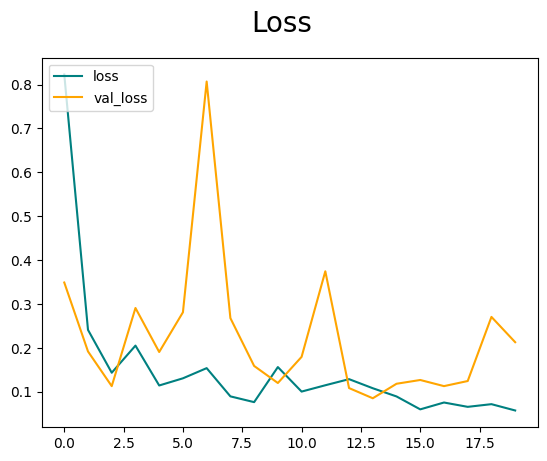

In [26]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

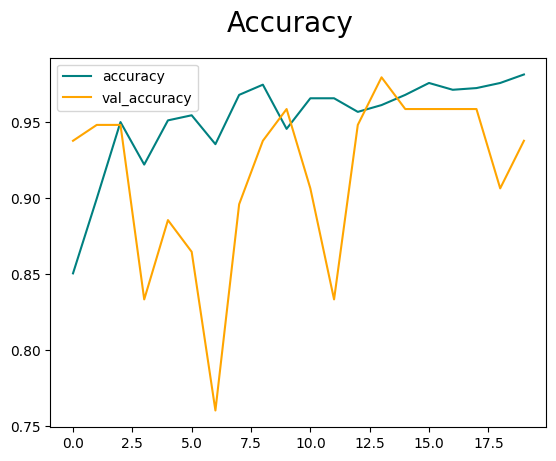

In [27]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [28]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [29]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 1s/step


In [30]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9390244, shape=(), dtype=float32) tf.Tensor(0.9479167, shape=(), dtype=float32)


In [31]:
model.save(os.path.join('models','/content/drive/MyDrive/Deep Learning Model/imageclassifier.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Model Deployment

In [35]:
from tensorflow.keras.models import load_model
import cv2
import matplotlib.pyplot as plt

In [34]:
loaded_model = load_model('/content/drive/MyDrive/Deep Learning Model/imageclassifier.h5')

In [56]:
def crop_and_resize(img):
    height, width, _ = img.shape
    size = min(height, width)
    start_x = (width - size) // 2
    start_y = (height - size) // 2
    end_x = start_x + size
    end_y = start_y + size
    cropped_img = img[start_y:end_y, start_x:end_x]
    resized_img = cv2.resize(cropped_img, (256, 256))
    return resized_img

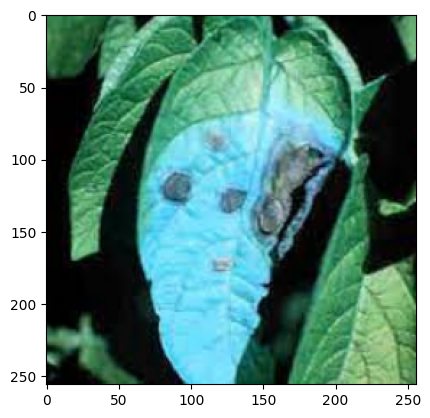

1/1 [==============================] - 0s 83ms/step


'Unhealthy_Plants_Potato'

In [60]:
img = cv2.imread('C.jpg') # an image which model has never seen and with different backgraound
img = crop_and_resize(img)
plt.imshow(img)
plt.show()

yhat = loaded_model.predict(np.expand_dims(img, 0))
class_names[round(yhat[0][0])]